In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('standardscaler_.csv')

In [68]:
df.head()

,Experience_Years,Age,Education_Level,Hours_Per_Week,Salary
0,5.99,34.63,3,41.12,87638.54
1,4.72,39.55,4,46.82,84956.80
2,6.30,23.01,1,40.63,73501.52
3,8.05,32.81,4,37.85,100707.27
4,4.53,26.75,3,40.61,80094.46


In [69]:
x = df.drop('Experience_Years',axis=1)
y = df['Experience_Years']

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=42)

In [71]:
poly = PolynomialFeatures(degree=2)
xpoly = poly.fit_transform(xtrain)

In [72]:
model = LinearRegression()
model.fit(xpoly,ytrain)
xtestpy = poly.transform(xtest)

In [73]:
model.score(xtestpy,ytest)

0.29376378607180464

- With Standard Scaler

In [74]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [75]:
poly = PolynomialFeatures(degree=2)
xpoly = poly.fit_transform(xtrain_scaled)

In [76]:
model = LinearRegression()

In [77]:
model.fit(xpoly,ytrain)
xtestpoly = poly.transform(xtest_scaled)

In [78]:
model.score(xtestpoly,ytest)

0.29376378514660406

- Not performing well even with polynomial features because the data plot is too scattered. Here neither Linear nor Polynomial will work, we will have to go to some Advanced Regression techniques.

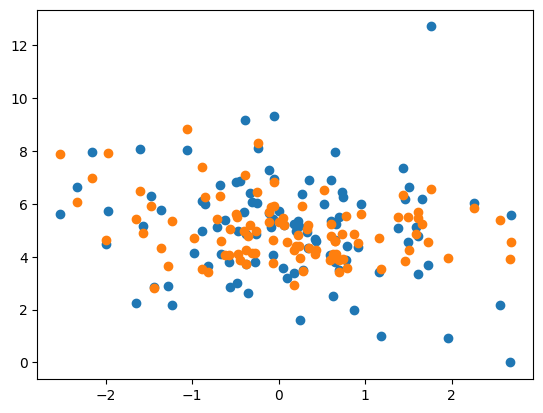

In [79]:
ypred = model.predict(xtestpoly)
plt.scatter(xtestpoly[:,1],ytest)
plt.scatter(xtestpoly[:,1],ypred)